# Traffic Estimator Project

# Step-1 Importing the Libraries

In [113]:
# for numerical computation and array manipulations
import numpy as np

# for dataframe and series manipulations with the dataset
import pandas as pd
from sklearn.model_selection import train_test_split

# for data viaualization
import matplotlib.pyplot as plt
import seaborn as sns

# for creating instances of machine Leanrinig algorithm
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge

# for data preprocessing purposes
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler

# for performance metrics analysis
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# for deep learning packages

import tensorflow as tf
import keras
from keras.layers import Dense , Input
from keras.optimizers import RMSprop
from keras import Model
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy

# Step-2 Loading the Datasets

In [13]:
data_1 = pd.read_excel(r'C:\Users\Admin\Documents\Harivansh_Anna_Work\Model_Building\Traffic_Estimator_Project\Used_Datasets\Traffic_Estimation_1.xlsx')
data_2 = pd.read_excel(r'C:\Users\Admin\Documents\Harivansh_Anna_Work\Model_Building\Traffic_Estimator_Project\Used_Datasets\Traffic_Estimation_2.xlsx')
data_3 = pd.read_excel(r'C:\Users\Admin\Documents\Harivansh_Anna_Work\Model_Building\Traffic_Estimator_Project\Used_Datasets\Traffic_Estimation_3.xlsx')
data_4 = pd.read_excel(r'C:\Users\Admin\Documents\Harivansh_Anna_Work\Model_Building\Traffic_Estimator_Project\Used_Datasets\Traffic_Estimation_4.xlsx')

# Step-3 Exploratory Data Analysis (Numerical)

In [4]:
print("Shape of the datasets")

print("shape of the dataset 1: ", data_1.shape)
print("shape of the dataset 2: ", data_2.shape)
print("shape of the dataset 3: ", data_3.shape)
print("shape of the dataset 4: ", data_4.shape)

Shape of the datasets
shape of the dataset 1:  (58, 11)
shape of the dataset 2:  (30, 7)
shape of the dataset 3:  (32, 6)
shape of the dataset 4:  (132022, 13)


In [5]:
print("information about the dataset")

print(" Dataset 1: ",data_1.info())
print(" Dataset 2: ",data_2.info())
print(" Dataset 3: ",data_3.info())
print(" Dataset 4: ",data_4.info())

information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UK Country                                    58 non-null     object 
 1   Port                                          58 non-null     object 
 2   Domestic: Coastwise                           58 non-null     float64
 3   Domestic: One Port                            58 non-null     float64
 4   Domestic Total                                58 non-null     float64
 5   International: All deep sea countries         58 non-null     float64
 6   International: All other short sea countries  58 non-null     float64
 7   International: EU [Note 1]                    58 non-null     float64
 8   International Total [Note 3]                  58 non-null     float64
 9   Unspecified [Note 4]                 

In [6]:
print("header sections among the datasets")
print("\n")
print("Dataset 1")
print(data_1.head())
print("\n")
print("Dataset 2")
print(data_2.head())
print("\n")
print("Dataset 3")
print(data_3.head())
print("\n")
print("Dataset 4")
print(data_4.head())

header sections among the datasets


Dataset 1
  UK Country        Port  Domestic: Coastwise  Domestic: One Port  \
0    England      Boston             0.000000                 0.0   
1    England     Bristol             1.507736                 0.0   
2    England       Dover             0.000000                 0.0   
3    England  Felixstowe            76.171991                 0.0   
4    England   Fleetwood             0.000000                 0.0   

   Domestic Total  International: All deep sea countries  \
0        0.000000                               0.000000   
1        1.507736                              31.438064   
2        0.000000                               0.007816   
3       76.171991                            1581.098174   
4        0.000000                               0.000000   

   International: All other short sea countries  International: EU [Note 1]  \
0                                      0.000000                    6.458250   
1                  

# Step-4 Data Pre-Processing

In [14]:
# taking the dataset-4 for considering the first application
data_4 = data_4.drop(['Year'] , axis = 1)

In [16]:
# segregating the input and output feature columns
x1 = data_4.iloc[: , 0:11]
y1 = data_4.iloc[: , 11]

In [20]:
# label_Encoding the categorical columns in the input feature columns
# creating the input feature columns list
input_feature_columns = ['Major Port', 'Port of Load/Unload Region',
       'Port of Load/Unload Country', 'Direction', 'Cargo Group',
       'Cargo Category', 'Cargo Description', 'Tonnage \n(thousands)',
       'Loaded Units (thousands)', 'Empty Units (thousands)',
       'Total Units\n(thousands)']
list_with_cat_columns1 = ['Major Port', 'Port of Load/Unload Region',
       'Port of Load/Unload Country', 'Direction', 'Cargo Group','Cargo Description']
list_wiht_num_columns1 = ['Cargo Category','Tonnage \n(thousands)',
       'Loaded Units (thousands)', 'Empty Units (thousands)',
       'Total Units\n(thousands)']

# creating the label encoder instance
le = LabelEncoder()

for i in list_with_cat_columns1:
    x1[i] = le.fit_transform(x1[i])
    
print(x1.head())
print(x1.isna().any())

   Major Port  Port of Load/Unload Region  Port of Load/Unload Country  \
0           0                           0                            0   
1           0                           0                           38   
2           0                           0                          113   
3           0                           0                          115   
4           0                           1                           29   

   Direction  Cargo Group  Cargo Category  Cargo Description  \
0          1            3              99                 15   
1          1            3              99                 15   
2          1            3              92                  9   
3          0            3              92                  9   
4          0            3              91                  5   

   Tonnage \n(thousands)  Loaded Units (thousands)  Empty Units (thousands)  \
0               0.212358                       0.0                      0.0   
1           

In [23]:
# replacing the missing values in the Loaded units feature cluns to 0

x1['Loaded Units (thousands)'] = x1['Loaded Units (thousands)'].fillna(0)
print(x1.isna().any())

Major Port                     False
Port of Load/Unload Region     False
Port of Load/Unload Country    False
Direction                      False
Cargo Group                    False
Cargo Category                 False
Cargo Description              False
Tonnage \n(thousands)          False
Loaded Units (thousands)       False
Empty Units (thousands)        False
Total Units\n(thousands)       False
dtype: bool


# Step-5 Exploratory Data Analysis (Graphical)

# Visualization-1 Scatterplot of the dataset to visualize the correlations in the dataset

C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


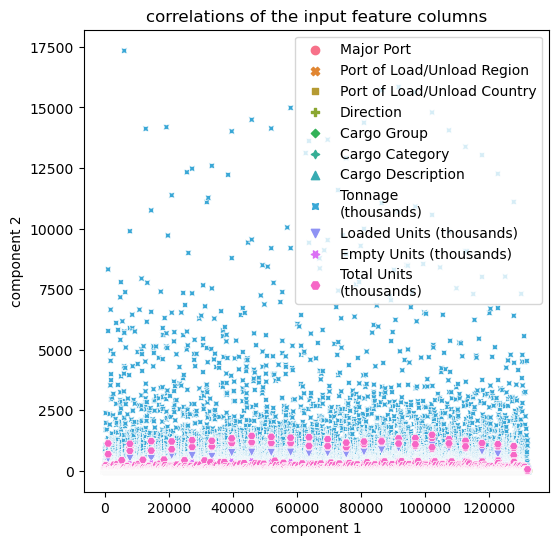

In [28]:
plt.figure(figsize = (6,6))
sns.scatterplot(x1)
plt.title("correlations of the input feature columns")
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.show()

# Visualization-2 Dimensionality Reduction

In [31]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

dim_reducer1 = PCA(n_components = 2)
components = dim_reducer1.fit_transform(x1)

In [32]:
dim_reducer2 = TSNE(n_components = 2 , perplexity = 30 , n_iter = 300)
components_2 = dim_reducer2.fit_transform(x1)

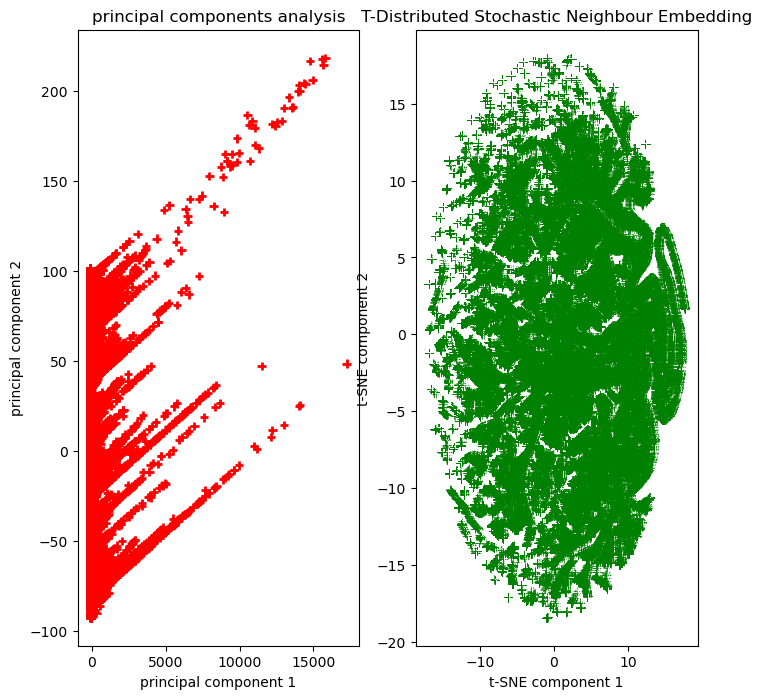

In [35]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.scatter(components[:,0] , components[:,1] , color = 'red' , marker = '+' , linestyle = '-.' , lw = 2)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("principal components analysis")

plt.subplot(1,2,2)
plt.scatter(components_2[:,0] , components_2[:,1] , color = 'green' , marker = '+' , linestyle = '-.' , lw = 0.5)
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.title("T-Distributed Stochastic Neighbour Embedding")

plt.show()

# Step-6 Machine Learning Approach

In [65]:
# segregating the training and testing for the data_4 dataset
components = np.ceil(components * 1000) / 1000
components = pd.DataFrame(components)

y1 = np.ceil(y1 * 1000) / 1000
y1 = pd.DataFrame(y1)

x_train_1 , x_test_1 , y_train_1 , y_test_1 = train_test_split(components , y1 , test_size = 0.1 , random_state = 42)
x_train_2 , x_test_2 , y_train_2 , y_test_2 = train_test_split(x1 , y1 , test_size = 0.1 , random_state = 42)

print(x_train_1.head())
print(y_train_1.head())

             0       1
126647  44.622 -15.003
121902 -87.124 -54.768
127550 -85.650 -75.657
21697  -48.340 -23.635
79672  -79.100  57.263
        TEU\n(thousands)
126647            17.159
121902             0.000
127550             0.000
21697              0.000
79672              0.000


In [52]:
# Linear Regression
linear_reg = LinearRegression()

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)

# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor()

# Random Forest Regression
random_forest_reg = RandomForestRegressor()

# Gradient Boosting Regression
gradient_boosting_reg = GradientBoostingRegressor()

# Support Vector Regression (SVR)
svr_reg = SVR()

# K-Nearest Neighbors Regression (KNN)
knn_reg = KNeighborsRegressor()

# Neural Network Regression (MLP)
mlp_reg = MLPRegressor()

# Elastic Net Regression
elastic_net_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Bayesian Regression
bayesian_reg = BayesianRidge()

In [66]:
linear_reg.fit(x_train_2 , y_train_2)
y_pred_1 = linear_reg.predict(x_test_2)

In [84]:
mae1 = mean_absolute_error(y_test_2, y_pred_1)
rmse1 = mean_squared_error(y_test_2, y_pred_1, squared=False)
r2_1 = r2_score(y_test_2, y_pred_1)

print("Mean Absolute Error:", mae1)
print("Root Mean Squared Error:", rmse1)
print("R-squared:", r2_1)

Mean Absolute Error: 2.412387198498685
Root Mean Squared Error: 10.578390134613308
R-squared: 0.14666855861030037


In [70]:
ridge_reg.fit(x_train_2 , y_train_2)
y_pred_2 = ridge_reg.predict(x_test_2)

In [85]:
mae2 = mean_absolute_error(y_test_2, y_pred_2)
rmse2 = mean_squared_error(y_test_2, y_pred_2, squared=False)
r2_2 = r2_score(y_test_2, y_pred_2)

print("Mean Absolute Error:", mae2)
print("Root Mean Squared Error:", rmse2)
print("R-squared:", r2_2)

Mean Absolute Error: 2.52927864460782
Root Mean Squared Error: 10.559125292319665
R-squared: 0.14977381871442363


In [77]:
lasso_reg.fit(x_train_2 , y_train_2)
y_pred_3 = lasso_reg.predict(x_test_2)

In [86]:
mae3 = mean_absolute_error(y_test_2, y_pred_3)
rmse3 = mean_squared_error(y_test_2, y_pred_3, squared=False)
r2_3 = r2_score(y_test_2, y_pred_3)

print("Mean Absolute Error:", mae3)
print("Root Mean Squared Error:", rmse3)
print("R-squared:", r2_3)

Mean Absolute Error: 0.04195569188820725
Root Mean Squared Error: 2.478450842753181
R-squared: 0.953157592584297


In [81]:
decision_tree_reg.fit(x_train_2 , y_train_2)
y_pred_4 = decision_tree_reg.predict(x_test_2)

In [87]:
mae4 = mean_absolute_error(y_test_2, y_pred_4)
rmse4 = mean_squared_error(y_test_2, y_pred_4, squared=False)
r2_4 = r2_score(y_test_2, y_pred_4)

print("Mean Absolute Error:", mae4)
print("Root Mean Squared Error:", rmse4)
print("R-squared:", r2_4)

Mean Absolute Error: 0.039675679769749325
Root Mean Squared Error: 2.4623110318072516
R-squared: 0.9537656869147296


In [83]:
random_forest_reg.fit(x_train_2 , y_train_2)
y_pred_5 = random_forest_reg.predict(x_test_2)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [89]:
mae5 = mean_absolute_error(y_test_2, y_pred_5)
rmse5 = mean_squared_error(y_test_2, y_pred_5, squared=False)
r2_5 = r2_score(y_test_2, y_pred_5)

print("Mean Absolute Error:", mae5)
print("Root Mean Squared Error:", rmse5)
print("R-squared:", r2_5)

Mean Absolute Error: 0.03062628796485642
Root Mean Squared Error: 1.0491387184537224
R-squared: 0.9916064744297682


In [90]:
gradient_boosting_reg.fit(x_train_2 , y_train_2)
y_pred_6 = gradient_boosting_reg.predict(x_test_2)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
mae6 = mean_absolute_error(y_test_2, y_pred_6)
rmse6 = mean_squared_error(y_test_2, y_pred_6, squared=False)
r2_6 = r2_score(y_test_2, y_pred_6)

print("Mean Absolute Error:", mae6)
print("Root Mean Squared Error:", rmse6)
print("R-squared:", r2_6)

Mean Absolute Error: 0.25032028575570964
Root Mean Squared Error: 1.1486235200593955
R-squared: 0.9899391656647579


In [92]:
svr_reg.fit(x_train_2 , y_train_2)
y_pred_7 = svr_reg.predict(x_test_2)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
mae7 = mean_absolute_error(y_test_2, y_pred_7)
rmse7 = mean_squared_error(y_test_2, y_pred_7, squared=False)
r2_7 = r2_score(y_test_2, y_pred_7)

print("Mean Absolute Error:", mae7)
print("Root Mean Squared Error:", rmse7)
print("R-squared:", r2_7)

Mean Absolute Error: 1.377791166464584
Root Mean Squared Error: 11.061699744252326
R-squared: 0.06691261118524383


In [93]:
knn_reg.fit(x_train_2 , y_train_2)
y_pred_8 = knn_reg.predict(x_test_2)

In [96]:
mae8 = mean_absolute_error(y_test_2, y_pred_8)
rmse8 = mean_squared_error(y_test_2, y_pred_8, squared=False)
r2_8 = r2_score(y_test_2, y_pred_8)

print("Mean Absolute Error:", mae8)
print("Root Mean Squared Error:", rmse8)
print("R-squared:", r2_8)

Mean Absolute Error: 0.5055307884571688
Root Mean Squared Error: 6.6917587797441875
R-squared: 0.6585248199435352


In [98]:
mlp_reg.fit(x_train_2 , y_train_2)
y_pred_9 = mlp_reg.predict(x_test_2)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
mae9 = mean_absolute_error(y_test_2, y_pred_9)
rmse9 = mean_squared_error(y_test_2, y_pred_9, squared=False)
r2_9 = r2_score(y_test_2, y_pred_9)

print("Mean Absolute Error:", mae9)
print("Root Mean Squared Error:", rmse9)
print("R-squared:", r2_9)

Mean Absolute Error: 1.1650190391575086
Root Mean Squared Error: 4.922276319775249
R-squared: 0.8152388879170487


In [100]:
elastic_net_reg.fit(x_train_2 , y_train_2)
y_pred_10 = elastic_net_reg.predict(x_test_2)

In [101]:
mae10 = mean_absolute_error(y_test_2, y_pred_10)
rmse10 = mean_squared_error(y_test_2, y_pred_10, squared=False)
r2_10 = r2_score(y_test_2, y_pred_10)

print("Mean Absolute Error:", mae10)
print("Root Mean Squared Error:", rmse10)
print("R-squared:", r2_10)

Mean Absolute Error: 2.4388535025210762
Root Mean Squared Error: 10.574012853074118
R-squared: 0.14737462051572325


In [102]:
bayesian_reg.fit(x_train_2 , y_train_2)
y_pred_11 = bayesian_reg.predict(x_test_2)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
mae11 = mean_absolute_error(y_test_2, y_pred_11)
rmse11 = mean_squared_error(y_test_2, y_pred_11, squared=False)
r2_11 = r2_score(y_test_2, y_pred_11)

print("Mean Absolute Error:", mae11)
print("Root Mean Squared Error:", rmse11)
print("R-squared:", r2_11)

Mean Absolute Error: 2.5276247529179225
Root Mean Squared Error: 10.559150891749344
R-squared: 0.14976969615102564


# Step-7 Model Performance analytics

In [109]:
list_for_MSE = [mae1 , mae2 , mae3 , mae4 , mae5 , mae6 , mae7 , mae8, mae9 , mae10 , mae11]
list_for_RMSE = [rmse1,
rmse2,
rmse3,
rmse4,
rmse5,
rmse6,
rmse7,
rmse8,
rmse9,
rmse10,
rmse11]
list_for_r2 = [r2_1 ,
r2_2 ,
r2_3 ,
r2_4 ,
r2_5 ,
r2_6 ,
r2_7 ,
r2_8 ,
r2_9 ,
r2_10 ,
r2_11 ,]

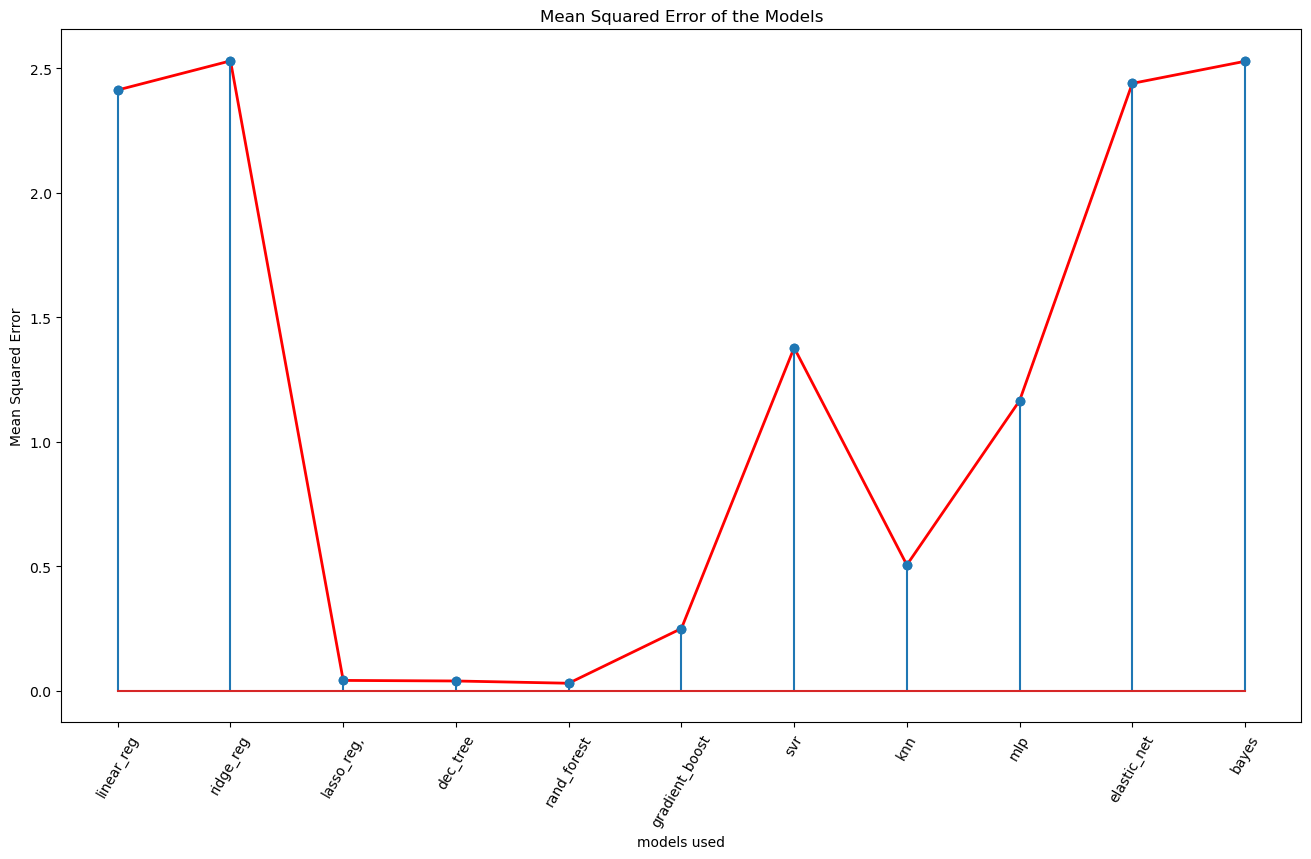

In [110]:
plt.figure(figsize = (16,9))
x_axis = np.linspace(1,11,11)
plt.plot(x_axis,list_for_MSE , color = 'red' , marker = '+'  , lw = 2)
plt.stem(x_axis, list_for_MSE)
plt.scatter(x_axis,list_for_MSE)
plt.xlabel("models used")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error of the Models")
plt.xticks([1, 2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10,11],['linear_reg','ridge_reg','lasso_reg,','dec_tree','rand_forest','gradient_boost',
                                              'svr','knn','mlp','elastic_net','bayes'] , rotation = 60)
plt.show()

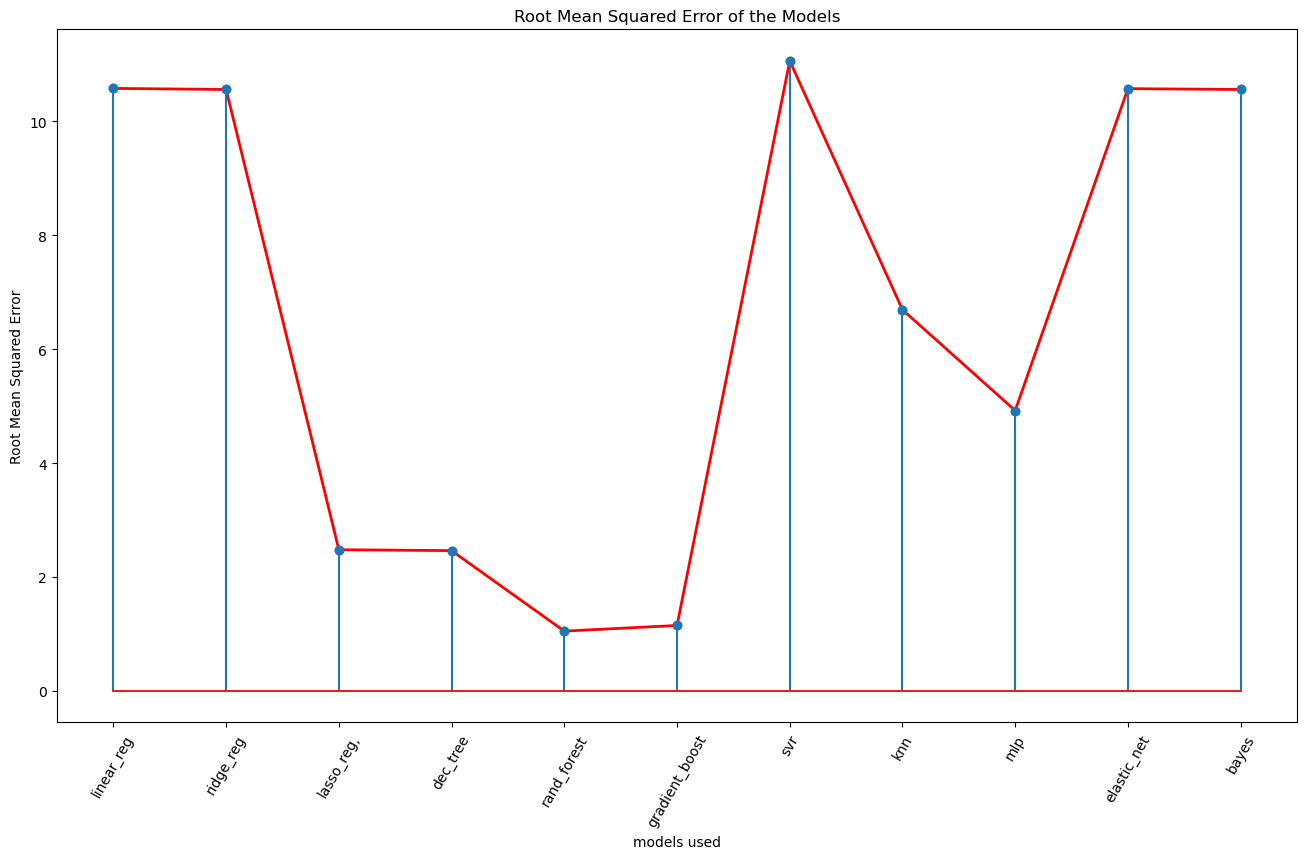

In [107]:
plt.figure(figsize = (16,9))
x_axis = np.linspace(1,11,11)
plt.plot(x_axis,list_for_RMSE , color = 'red' , marker = '+' , lw = 2)
plt.stem(x_axis, list_for_RMSE)
plt.scatter(x_axis,list_for_RMSE)
plt.xlabel("models used")
plt.ylabel("Root Mean Squared Error")
plt.title("Root Mean Squared Error of the Models")
plt.xticks([1, 2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10,11],['linear_reg','ridge_reg','lasso_reg,','dec_tree','rand_forest','gradient_boost',
                                              'svr','knn','mlp','elastic_net','bayes'] , rotation = 60)
plt.show()

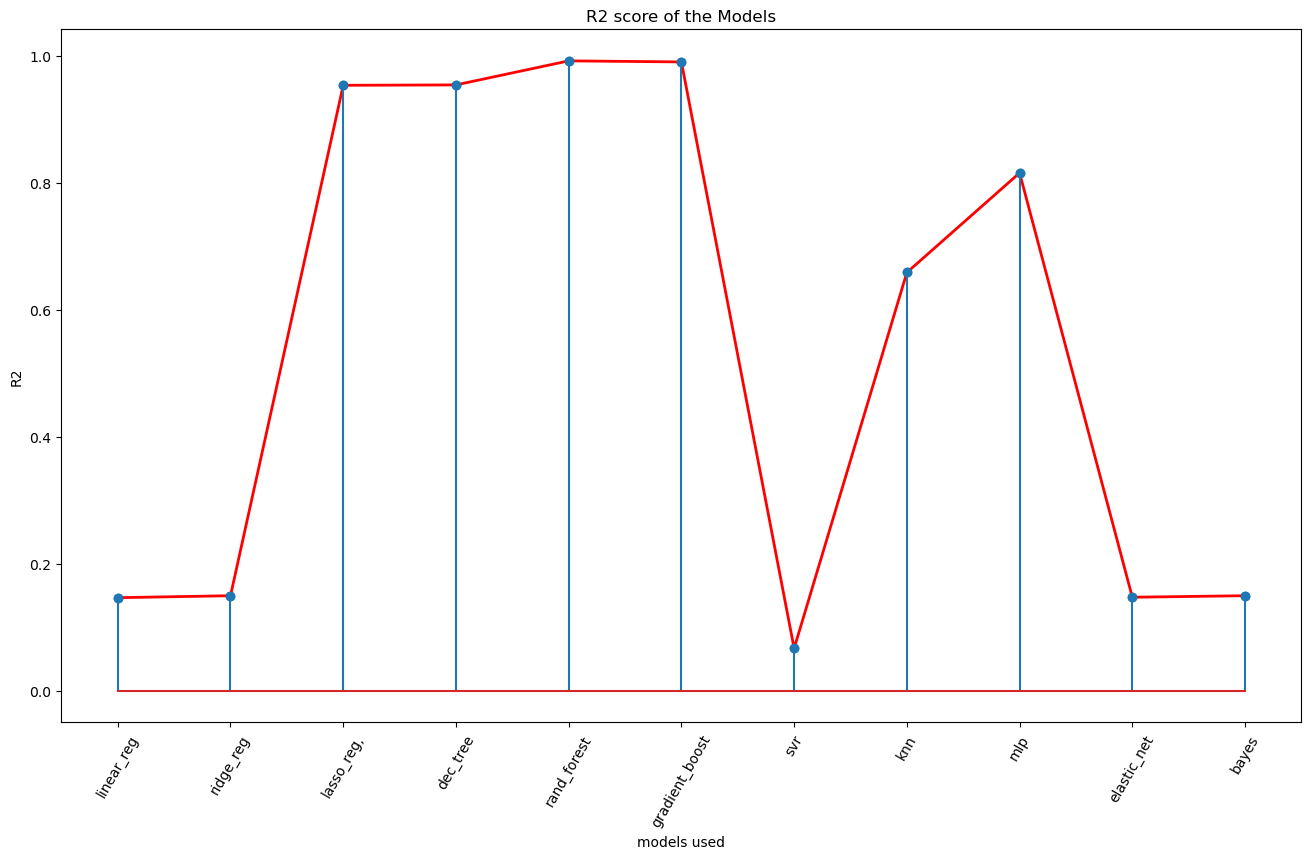

In [111]:
plt.figure(figsize = (16,9))
x_axis = np.linspace(1,11,11)
plt.plot(x_axis,list_for_r2 , color = 'red' , marker = '+' , lw = 2)
plt.stem(x_axis, list_for_r2)
plt.scatter(x_axis,list_for_r2)
plt.xlabel("models used")
plt.ylabel("R2")
plt.title("R2 score of the Models")
plt.xticks([1, 2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10,11],['linear_reg','ridge_reg','lasso_reg,','dec_tree','rand_forest','gradient_boost',
                                              'svr','knn','mlp','elastic_net','bayes'] , rotation = 60)
plt.show()

# Step-8 Deep Learning Approach

In [116]:
# building the sequential model
from keras.models import Sequential
seq_model = Sequential()

seq_model.add(Dense(512 ,input_dim = 11, activation = 'relu'))
seq_model.add(Dense(256 , activation = 'relu'))
seq_model.add(Dense(128 , activation = 'relu'))
seq_model.add(Dense(64 , activation = 'relu'))
seq_model.add(Dense(32 , activation = 'relu'))
seq_model.add(Dense(1 , activation = 'relu'))

print(seq_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6144      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 180737 (706.00 KB)
Trainable params: 180

In [126]:
# compiling the model

optimizer = RMSprop()
loss_function = 'mean_squared_error'
metrics = [loss_function]

seq_model.compile(optimizer = optimizer , loss = loss_function , metrics = metrics)

In [127]:
# fitting the training data into the model

print("Training the Sequential Model")

seq_hist = seq_model.fit(
    x_train_2 ,
    y_train_2,
epochs = 100,
batch_size = 64,
verbose = 2,
validation_data = (x_test_2, y_test_2))

Training the Sequential Model
Epoch 1/100
1857/1857 - 7s - loss: 161.5034 - mean_squared_error: 161.5034 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 7s/epoch - 4ms/step
Epoch 2/100
1857/1857 - 6s - loss: 161.5034 - mean_squared_error: 161.5034 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 6s/epoch - 3ms/step
Epoch 3/100
1857/1857 - 6s - loss: 161.5033 - mean_squared_error: 161.5033 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 6s/epoch - 3ms/step
Epoch 4/100
1857/1857 - 6s - loss: 161.5032 - mean_squared_error: 161.5032 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 6s/epoch - 3ms/step
Epoch 5/100
1857/1857 - 6s - loss: 161.5034 - mean_squared_error: 161.5034 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 6s/epoch - 3ms/step
Epoch 6/100
1857/1857 - 6s - loss: 161.5032 - mean_squared_error: 161.5032 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 6s/epoch - 3ms/step
Epoch 7/100
1857/1857 - 6s - loss: 161.5032 - mean_s

In [136]:
test_score_seq = seq_model.evaluate(x_test_2 , y_test_2 , verbose = 2)
print("test Loss ",test_score_seq[0] )
print("mean squared error ",test_score_seq[1])

413/413 - 1s - loss: 133.3703 - mean_squared_error: 133.3703 - 585ms/epoch - 1ms/step
test Loss  133.37025451660156
mean squared error  133.37025451660156


In [121]:
# building the functionalAPI

input_layer = Input(shape = (11,))

hidden_layer_1 = Dense(512, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(256, activation = 'relu')(hidden_layer_1)
hidden_layer_3 = Dense(128, activation = 'relu')(hidden_layer_2)
hidden_layer_4 = Dense(64, activation = 'relu')(hidden_layer_3)
hidden_layer_5 = Dense(32, activation = 'relu')(hidden_layer_4)

output_layer = Dense(1 , activation = 'relu')(hidden_layer_5)

functional_model = Model(inputs = input_layer , outputs = output_layer)

print(functional_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_6 (Dense)             (None, 512)               6144      
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33    

In [131]:
optimizer = RMSprop()
loss_function = 'mean_squared_error'
metrics = [loss_function]

functional_model.compile(optimizer = optimizer , loss = loss_function , metrics = metrics)

In [132]:
print("Training the Functional Model")

func_hist = functional_model.fit(
    x_train_2 ,
    y_train_2,
epochs = 100,
batch_size = 64,
verbose = 2,
validation_data = (x_test_2, y_test_2))

Training the Functional Model
Epoch 1/100
1857/1857 - 7s - loss: 161.5887 - mean_squared_error: 161.5887 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 7s/epoch - 4ms/step
Epoch 2/100
1857/1857 - 6s - loss: 161.5035 - mean_squared_error: 161.5035 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 6s/epoch - 3ms/step
Epoch 3/100
1857/1857 - 6s - loss: 161.5033 - mean_squared_error: 161.5033 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 6s/epoch - 3ms/step
Epoch 4/100
1857/1857 - 6s - loss: 161.5035 - mean_squared_error: 161.5035 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 6s/epoch - 3ms/step
Epoch 5/100
1857/1857 - 6s - loss: 161.5033 - mean_squared_error: 161.5033 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 6s/epoch - 3ms/step
Epoch 6/100
1857/1857 - 6s - loss: 161.5035 - mean_squared_error: 161.5035 - val_loss: 133.3703 - val_mean_squared_error: 133.3703 - 6s/epoch - 3ms/step
Epoch 7/100
1857/1857 - 6s - loss: 161.5034 - mean_s

In [135]:
test_score_func = functional_model.evaluate(x_test_2 , y_test_2 , verbose = 2)
print("test Loss ",test_score_func[0])
print("mean squared error ",test_score_func[1])

413/413 - 1s - loss: 133.3703 - mean_squared_error: 133.3703 - 598ms/epoch - 1ms/step
test Loss  133.37025451660156
mean squared error  133.37025451660156


# Step-9 Performance Metrics for deep Learning Model

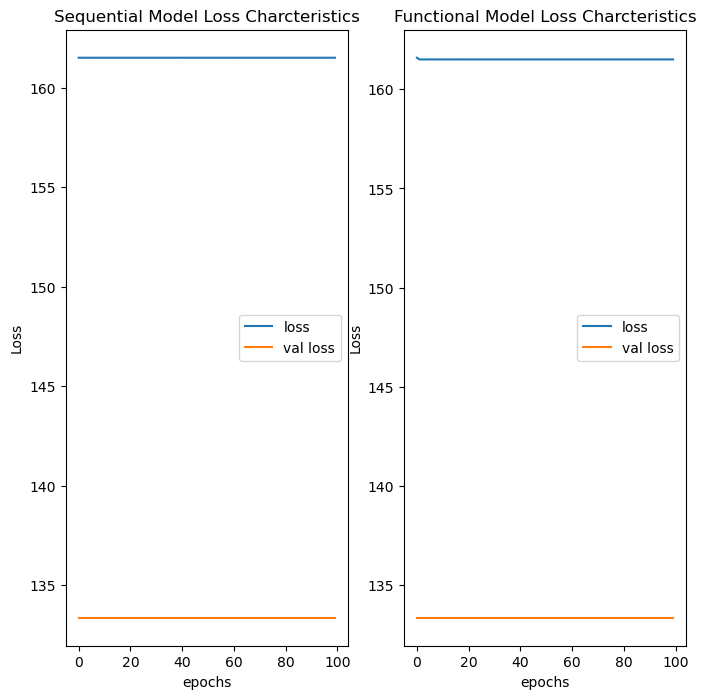

In [141]:
plt.figure(figsize = (8,8))

plt.subplot(1,2,1)
plt.plot(seq_hist.history['loss'],label = 'training loss')
plt.plot(seq_hist.history['val_loss'],label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['loss','val loss'])
plt.title("Sequential Model Loss Charcteristics")


plt.subplot(1,2,2)
plt.plot(func_hist.history['loss'],label = 'training loss')
plt.plot(func_hist.history['val_loss'],label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['loss','val loss'])
plt.title("Functional Model Loss Charcteristics")

plt.show()

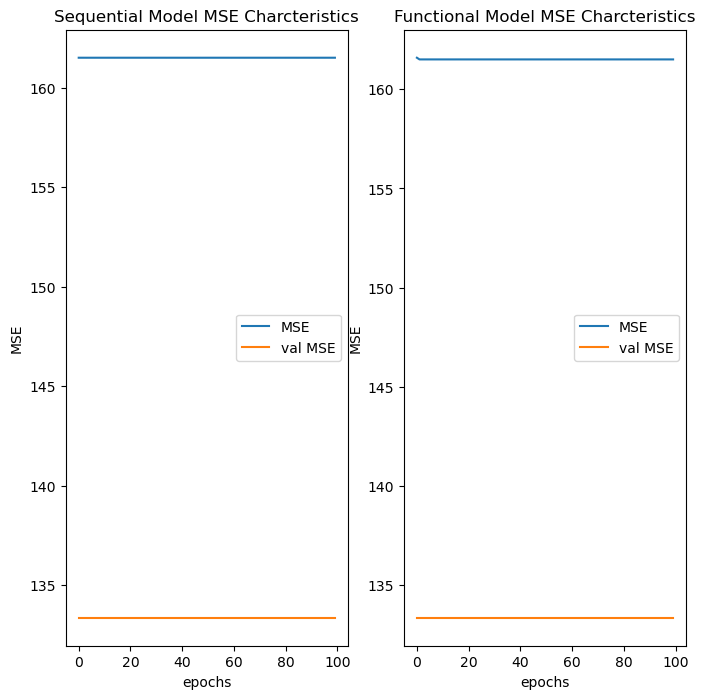

In [142]:
plt.figure(figsize = (8,8))

plt.subplot(1,2,1)
plt.plot(seq_hist.history['mean_squared_error'],label = 'training loss')
plt.plot(seq_hist.history['val_mean_squared_error'],label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend(['MSE' , 'val MSE'])
plt.title("Sequential Model MSE Charcteristics")


plt.subplot(1,2,2)
plt.plot(func_hist.history['mean_squared_error'],label = 'training loss')
plt.plot(func_hist.history['val_mean_squared_error'],label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.legend(['MSE' , 'val MSE'])
plt.title("Functional Model MSE Charcteristics")

plt.show()

# Step-10 Saving the best Performing Model

In [143]:
# saving the sequential model
seq_model.save('traffic_estimator_sequential.h5')
seq_model.save('traffic_estimator_sequential.keras')

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [144]:
# saving the functional model
functional_model.save('traffic_estimator_functional.h5')
functional_model.save('traffic_estimator_functional.keras')

In [146]:
# saving the best performing ml models
model_list = ["linear_reg.pkl","ridge_reg.pkl","lasso_reg.pkl","knn_reg.pkl","svr_reg.pkl",
              "random_forest_reg.pkl","dtc_reg.pkl","mlp_reg.pkl","elstic_net.pkl",'gradient_boost_reg.pkl',
              "bayesian_reg.pkl"]

for i in model_list:
    with open(i, 'wb') as file:
        pickle.dump(i,file)